In [13]:
pip uninstall keras


^C
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install keras==3.0

     -------------------------------------- 997.1/997.1 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 101.3/101.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.0 which is incompatible.


In [2]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs

ImportError: You need to first `import keras` in order to use `keras_applications`. For instance, you can do:

```
import keras
from keras_applications import vgg16
```

Or, preferably, this equivalent formulation:

```
from keras import applications
```


In [3]:
import numpy as np
import warnings

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.utils import get_source_inputs
from tensorflow.python.keras.utils import layer_utils

def _obtain_input_shape(input_shape,
                        default_size,
                        min_size,
                        data_format,
                        require_flatten,
                        weights=None):
    if weights != 'imagenet' and input_shape is not None:
        if data_format == 'channels_first':
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[0] != 3 and require_flatten:
                    raise ValueError(
                        'When setting `include_top=True` '
                        'and loading `imagenet` weights, '
                        '`input_shape` should be (3, {default_height}, {default_width}) '
                        'or (3, {default_width}, {default_height}), '
                        'depending on your `data_format` '
                        'of image array.'.format(default_height=default_size,
                                                 default_width=default_size))
                if ((input_shape[1] is not None and input_shape[1] < min_size) or
                   (input_shape[2] is not None and input_shape[2] < min_size)):
                    raise ValueError('Input size must be at least {min_size}x{min_size}; '
                                     'got `input_shape={input_shape}`'.format(min_size=min_size,
                                                                               input_shape=input_shape))
        else:
            if input_shape is not None:
                if len(input_shape) != 3:
                    raise ValueError(
                        '`input_shape` must be a tuple of three integers.')
                if input_shape[-1] != 3 and require_flatten:
                    raise ValueError(
                        'When setting `include_top=True` '
                        'and loading `imagenet` weights, '
                        '`input_shape` should be '
                        '`(height, width, 3)` '
                        'or `(3, height, width)` '
                        'depending on your `data_format` '
                        'of image array.')
                if ((input_shape[0] is not None and input_shape[0] < min_size) or
                   (input_shape[1] is not None and input_shape[1] < min_size)):
                    raise ValueError('Input size must be at least {min_size}x{min_size}; '
                                     'got `input_shape={input_shape}`'.format(min_size=min_size,
                                                                               input_shape=input_shape))
    else:
        if data_format == 'channels_first':
            if require_flatten:
                input_shape = (3, default_size, default_size)
            else:
                input_shape = (3, None, None)
        else:
            if require_flatten:
                input_shape = (default_size, default_size, 3)
            else:
                input_shape = (None, None, 3)
    if require_flatten:
        if None in input_shape:
            raise ValueError('If `include_top` is True, '
                             'you should specify a static `input_shape`. '
                             'Got `input_shape={input_shape}`'.format(input_shape=input_shape))
    return input_shape

input_shape = _obtain_input_shape(None,
                                   default_size=224,
                                   min_size=32,
                                   data_format=K.image_data_format(),
                                   require_flatten=True)

In [32]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 224, 224   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [33]:
model = VGGupdated(classes = 2) # pit and nonpit

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('TwoKM_dataset')

room_types = os.listdir('TwoKM_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of pits found: ", len(dataset_path))

['Non_Pit', 'Pit']
Types of pits found:  2


In [36]:
dataArray = []

for item in room_types:
 # Get all the file names
 all_images = os.listdir('TwoKM_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_images:
    dataArray.append((item, str('TwoKM_dataset' + '/' +item) + '/' + room))
#     print(dataArray)

In [37]:
print(dataArray)

[('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_49.0582241_-113.7150728.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_49.1865802_-113.7309784.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_49.187687_-113.733499.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_49.1931795_-113.9964296.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7507676_-110.5989456.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7508083_-110.9757386.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7511183_-110.6327079.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7511405_-110.6093397.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7511452_-110.9359778.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7514814_-110.8064397.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7516084_-114.3620685.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7521018_-110.5660134.png'), ('Non_Pit', 'TwoKM_dataset/Non_Pit/pitImage_50.7521364_-114.3689824.png'), ('Non_Pit', 'TwoKM_dataset

In [38]:
rooms_df = pd.DataFrame(data=dataArray, columns=['image type', 'image'])
#print(rooms_df.head())
print(rooms_df.tail())

     image type                                              image
2741        Pit  TwoKM_dataset/Pit/pitImage_57.87426521_-103.87...
2742        Pit  TwoKM_dataset/Pit/pitImage_57.98101999_-103.79...
2743        Pit  TwoKM_dataset/Pit/pitImage_58.14684183_-103.71...
2744        Pit  TwoKM_dataset/Pit/pitImage_58.1776161_-103.697...
2745        Pit  TwoKM_dataset/Pit/pitImage_58.22060059_-103.70...


In [39]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(rooms_df))

room_count = rooms_df['image type'].value_counts()

print("images in each category: ")
print(room_count)

Total number of images in the dataset:  2746
images in each category: 
Non_Pit    1434
Pit        1312
Name: image type, dtype: int64


In [40]:
import cv2
path = 'TwoKM_dataset/'


im_size = 224

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [41]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape    

(2746, 224, 224, 3)

In [42]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['image type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 ... 1 1 1]


In [43]:
from sklearn.preprocessing import OneHotEncoder

# Assuming y is your target variable
y = y.reshape(-1, 1)

# Initialize OneHotEncoder
onehotencoder = OneHotEncoder()

# Fit and transform the target variable
Y = onehotencoder.fit_transform(y).toarray()

# Display the shape of Y
print(Y.shape)

(2746, 2)


In [47]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2196, 224, 224, 3)
(2196, 2)
(550, 224, 224, 3)
(550, 2)


In [48]:
model.fit(train_x, train_y, epochs = 70, batch_size = 32)  

Epoch 1/70
69/69 [==============================] - 886s 13s/step - loss: 0.7017 - accuracy: 0.5196
Epoch 2/70
69/69 [==============================] - 879s 13s/step - loss: 0.6922 - accuracy: 0.5241
Epoch 3/70
69/69 [==============================] - 876s 13s/step - loss: 0.6923 - accuracy: 0.5241
Epoch 4/70
69/69 [==============================] - 880s 13s/step - loss: 0.6922 - accuracy: 0.5241
Epoch 5/70
69/69 [==============================] - 889s 13s/step - loss: 0.6923 - accuracy: 0.5241
Epoch 6/70
69/69 [==============================] - 892s 13s/step - loss: 0.6922 - accuracy: 0.5241
Epoch 7/70
69/69 [==============================] - 886s 13s/step - loss: 0.6923 - accuracy: 0.5241
Epoch 8/70
69/69 [==============================] - 887s 13s/step - loss: 0.6923 - accuracy: 0.5241
Epoch 9/70
69/69 [==============================] - 883s 13s/step - loss: 0.6922 - accuracy: 0.5241
Epoch 10/70
69/69 [==============================] - 884s 13s/step - loss: 0.6921 - accuracy: 0.5241

In [50]:
model.save('C:/Python-cannot-upload-to-GitHub/Cars/myVGG16PitsModel.h5')

In [51]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

18/18 [==============================] - 42s 2s/step - loss: 0.6930 - accuracy: 0.5145
Loss = 0.6929722428321838
Test Accuracy = 0.5145454406738281




Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 900ms/step
[[0.5255913 0.4744087]]


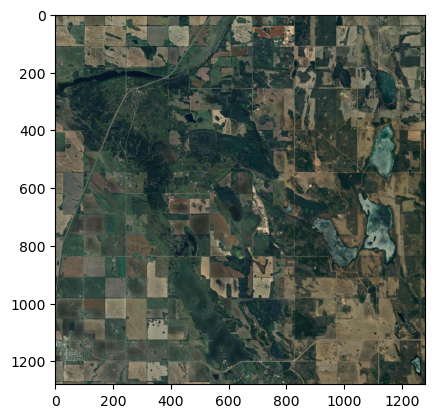

In [7]:
import tensorflow as tf
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

model = tf.keras.models.load_model('C:/Python-cannot-upload-to-GitHub/Cars/myVGG16PitsModel.h5')

img_path = 'C:/Users/patel1637/pitdata3/image_15.png'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

In [65]:
print(model.predict(x))

1/1 [==============================] - 0s 112ms/step
[[0.5255913 0.4744087]]


In [12]:
import os
import numpy as np

# Assuming model is already defined somewhere in your code
# model = ...

folder_path = 'C:/Users/patel1637/TwoKM_dataset/Pit'
#folder_path = 'C:/Users/patel1637/TwoKM_dataset/Non_Pit'
image_files = os.listdir(folder_path)

for file_name in image_files:
    if file_name.endswith('.png') or file_name.endswith('.jpg'):  # Assuming only PNG and JPG files are present
        img_path = os.path.join(folder_path, file_name)
        
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        print('Input image shape:', x.shape)

        my_image = imread(img_path)

        print(model.predict(x))


Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 172ms/step
[[0.5256794  0.47432056]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 167ms/step
[[0.5256792 0.4743209]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 163ms/step
[[0.52567774 0.47432223]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 166ms/step
[[0.52567357 0.4743264 ]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 177ms/step
[[0.5256739 0.4743261]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 173ms/step
[[0.5256801  0.47431982]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 140ms/step
[[0.5256626 0.4743374]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 144ms/step
[[0.525652   0.47434804]]
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 186ms/st

KeyboardInterrupt: 